<h1>Import Packages</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random
import missingno as msno

C:\Users\siyun\AppData\Local\Temp\ipykernel_24564\461895069.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<h1>Q1</h1>

<h2>Collect Data</h2>

In [2]:
#create final dataframe
joined_df = pd.DataFrame()
#create path to dataset directory
data_path = 'data'

In [3]:
#list all columns available in dataset
column_names = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',	'ZIP CODE',	'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']

In [4]:
#define function which reads excel files and returns dataframe from that excel file
def collect_data(filename, header_skip):
    df = pd.read_excel(data_path+'/'+filename, header=None, skiprows=header_skip)
    df.columns = column_names

    parts = filename.split("_", 1)
    year = parts[0] #collect the file year
    parts = parts[1].split(".", 1)
    region = parts[0] #collect the file region

    df['REGION'] = region #append the region to the dataframe
    df['YEAR'] = year #append the year to the dataframe
    return df

In [5]:
#header skip sequence is to skip initial rows in each file in data
header_skip_sequence = [0,8,8,8,8,8,8,8,8,8,8,5,5,5,5,5]

In [6]:
#iterate through each file and concatenate all data from excel files to a joined dataframe
#for index, file_name in enumerate(os.listdir(data_path)):
#    if file_name.endswith('.xlsx'):
#        joined_df = pd.concat([joined_df, collect_data(file_name, header_skip_sequence[index])], ignore_index=True)

In [7]:
#export joined dataframe to csv file
#joined_df.to_csv('joined_data.csv', index=False)

<p>Data was collected from excel files and then exported to csv files, all files were concatenated together to one dataframe. In addition the year and region from the file name was appended as a column to the final dataframe.</p>

<hr>

<h2>Initial EDA</h2>

In [8]:
#import from csv file and create dataframe
df = pd.read_csv('joined_data.csv')

In [9]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,REGION,YEAR
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,23,NaN,A1,408 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,0,2021-01-20,bronx,2021
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,600000,2021-01-15,bronx,2021
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,63,NaN,A1,469 EAST 185TH STREET,NaN,...,1.0,1650.0,1296.0,1910.0,1,A1,455000,2021-12-23,bronx,2021
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3045,12,NaN,A1,2052 BATHGATE AVENUE,NaN,...,1.0,2340.0,1516.0,1910.0,1,A1,580000,2021-07-22,bronx,2021
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,NaN,A1,2075 BATHGATE AVENUE,NaN,...,1.0,1986.0,1344.0,1899.0,1,A1,0,2021-09-17,bronx,2021


In [10]:
#get borough dataframe subset
def get_borough_df(df, borough):
    return df[df['BOROUGH'] == borough]

In [11]:
#statistics of house price for each borough
for i in range(1,6):
    borough = get_borough_df(df, i)
    print(borough['BOROUGH'].unique())
    borough.describe()

[1]
[2]
[3]
[4]
[5]


In [12]:
borough_dict = {
    'borough_1':get_borough_df(df, 1),
    'borough_2':get_borough_df(df, 2),
    'borough_3':get_borough_df(df, 3),
    'borough_4':get_borough_df(df, 4),
    'borough_5':get_borough_df(df, 5)
}

In [13]:
list_of_means_including_missing = list()
list_of_means_excluding_missing = list()
list_of_boroughs = [1,2,3,4,5]

In [14]:
#bar graph for the mean sale price for each borough (including missing sale prices)
for borough_num in range(1,6):
    mean_value = borough_dict['borough_'+str(borough_num)]['SALE PRICE'].mean()
    print('Borough Num: ' + str(borough_num) + '\tCount: ' + str(borough_dict['borough_'+str(borough_num)]['SALE PRICE'].count()))
    list_of_means_including_missing.append(mean_value)

Borough Num: 1	Count: 60814
Borough Num: 2	Count: 20598
Borough Num: 3	Count: 76126
Borough Num: 4	Count: 81550
Borough Num: 5	Count: 25262


In [15]:
print(list_of_means_including_missing)

[3061197.2486762917, 834502.6987086125, 1204291.99594094, 948481.9660085837, 540512.6638429262]


In [16]:
#bar graph for the mean sale price for each borough (excluding missing sale prices)
for borough_num in range(1,6):
    temp_df=borough_dict['borough_'+str(borough_num)]
    mean_value = temp_df[temp_df['SALE PRICE'] != 0]['SALE PRICE'].mean()
    print('Borough Num: ' + str(borough_num) + '\tCount: ' + str(temp_df[temp_df['SALE PRICE'] != 0]['SALE PRICE'].count()))
    list_of_means_excluding_missing.append(mean_value)

Borough Num: 1	Count: 50629
Borough Num: 2	Count: 14350
Borough Num: 3	Count: 51300
Borough Num: 4	Count: 54927
Borough Num: 5	Count: 17584


In [17]:
print(list_of_means_excluding_missing)

[3677016.126745541, 1197845.755261324, 1787094.200448343, 1408209.1562983596, 776525.8709053685]


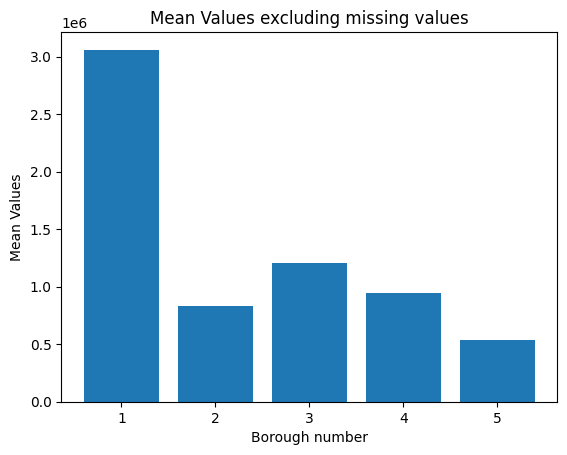

In [18]:
# Create a bar chart for mean values
plt.bar(list_of_boroughs, list_of_means_including_missing)
plt.ylabel('Mean Values')
plt.xlabel('Borough number')
plt.title('Mean Values excluding missing values')
plt.show()

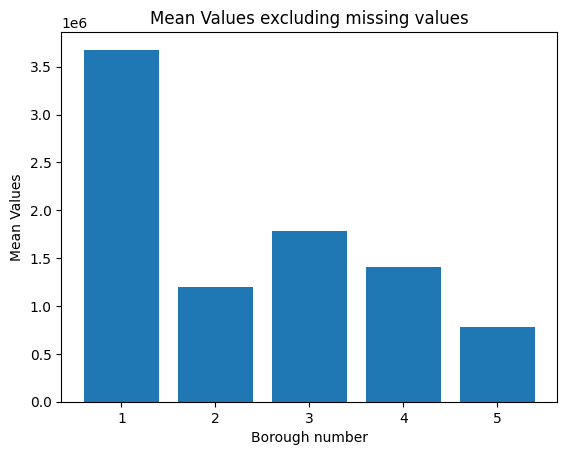

In [19]:
# Create a bar chart for mean values
plt.bar(list_of_boroughs, list_of_means_excluding_missing)
plt.ylabel('Mean Values')
plt.xlabel('Borough number')
plt.title('Mean Values excluding missing values')
plt.show()

<p>As we can see through the bar charts above there is a clear distinction between the average sale prices in each borough. Borough 1 clearly has the highest average sale price being over double the average of the next highest borough in borough number 3. We can see this trend continue even after excluding the missing sale price values with borough number 1 still being the clear winner. We can also see that boroughs 2, 3 and 4 all have around the same average sale price with borough 5 having the clear lowest average. This trend also continues when we remove the missing sale prices.</p>
<p>The counts of each borough were also determined and it is clear that the dataset is not balanced when it comes to the the count of each borough. Borough 4 has the most records with over 81 thousand and borough 2 has the lowest amount of records at around 20 thousand. This means that borough 4 has over 4 times the amount of records as borough 2. This trend also continues when we remove the records with missing sale prices with borough 4 having around 55 thousand and borough 2 having around 14 thousand. In this case borough 4 has just under 4 times the amount of records as borough 2.</p>

In [20]:
#types of houses involved in the given dataset, 
print('All Building Class Categories')
print(df['BUILDING CLASS CATEGORY'].unique())

print('\nTotal Number of Building Class Categories')
print(len(df['BUILDING CLASS CATEGORY'].unique()))

print('\nTop 10 Building Class Categories')
print(df['BUILDING CLASS CATEGORY'].value_counts()[:10])

print('\nLowest Building Class Category')
print(str(df['BUILDING CLASS CATEGORY'].value_counts().idxmin()) + ' ' + str(df['BUILDING CLASS CATEGORY'].value_counts().min()))

#total number of houses
print('\nTotal Number of Houses')
print(len(df))

All Building Class Categories
['01 ONE FAMILY DWELLINGS' '02 TWO FAMILY DWELLINGS'
 '03 THREE FAMILY DWELLINGS' '05 TAX CLASS 1 VACANT LAND'
 '08 RENTALS - ELEVATOR APARTMENTS' '10 COOPS - ELEVATOR APARTMENTS'
 '21 OFFICE BUILDINGS' '22 STORE BUILDINGS' '26 OTHER HOTELS'
 '27 FACTORIES' '29 COMMERCIAL GARAGES' '30 WAREHOUSES'
 '31 COMMERCIAL VACANT LAND' '41 TAX CLASS 4 - OTHER'
 '04 TAX CLASS 1 CONDOS' '06 TAX CLASS 1 - OTHER'
 '07 RENTALS - WALKUP APARTMENTS' '14 RENTALS - 4-10 UNIT'
 '39 TRANSPORTATION FACILITIES' '09 COOPS - WALKUP APARTMENTS'
 '12 CONDOS - WALKUP APARTMENTS' '43 CONDO OFFICE BUILDINGS'
 '13 CONDOS - ELEVATOR APARTMENTS' '32 HOSPITAL AND HEALTH FACILITIES'
 '37 RELIGIOUS FACILITIES' '38 ASYLUMS AND HOMES'
 '46 CONDO STORE BUILDINGS' '28 COMMERCIAL CONDOS'
 '36 OUTDOOR RECREATIONAL FACILITIES'
 '35 INDOOR PUBLIC AND CULTURAL FACILITIES'
 '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC' '33 EDUCATIONAL FACILITIES'
 '44 CONDO PARKING' '17 CONDO COOPS' '47 CONDO NON-BUSINES

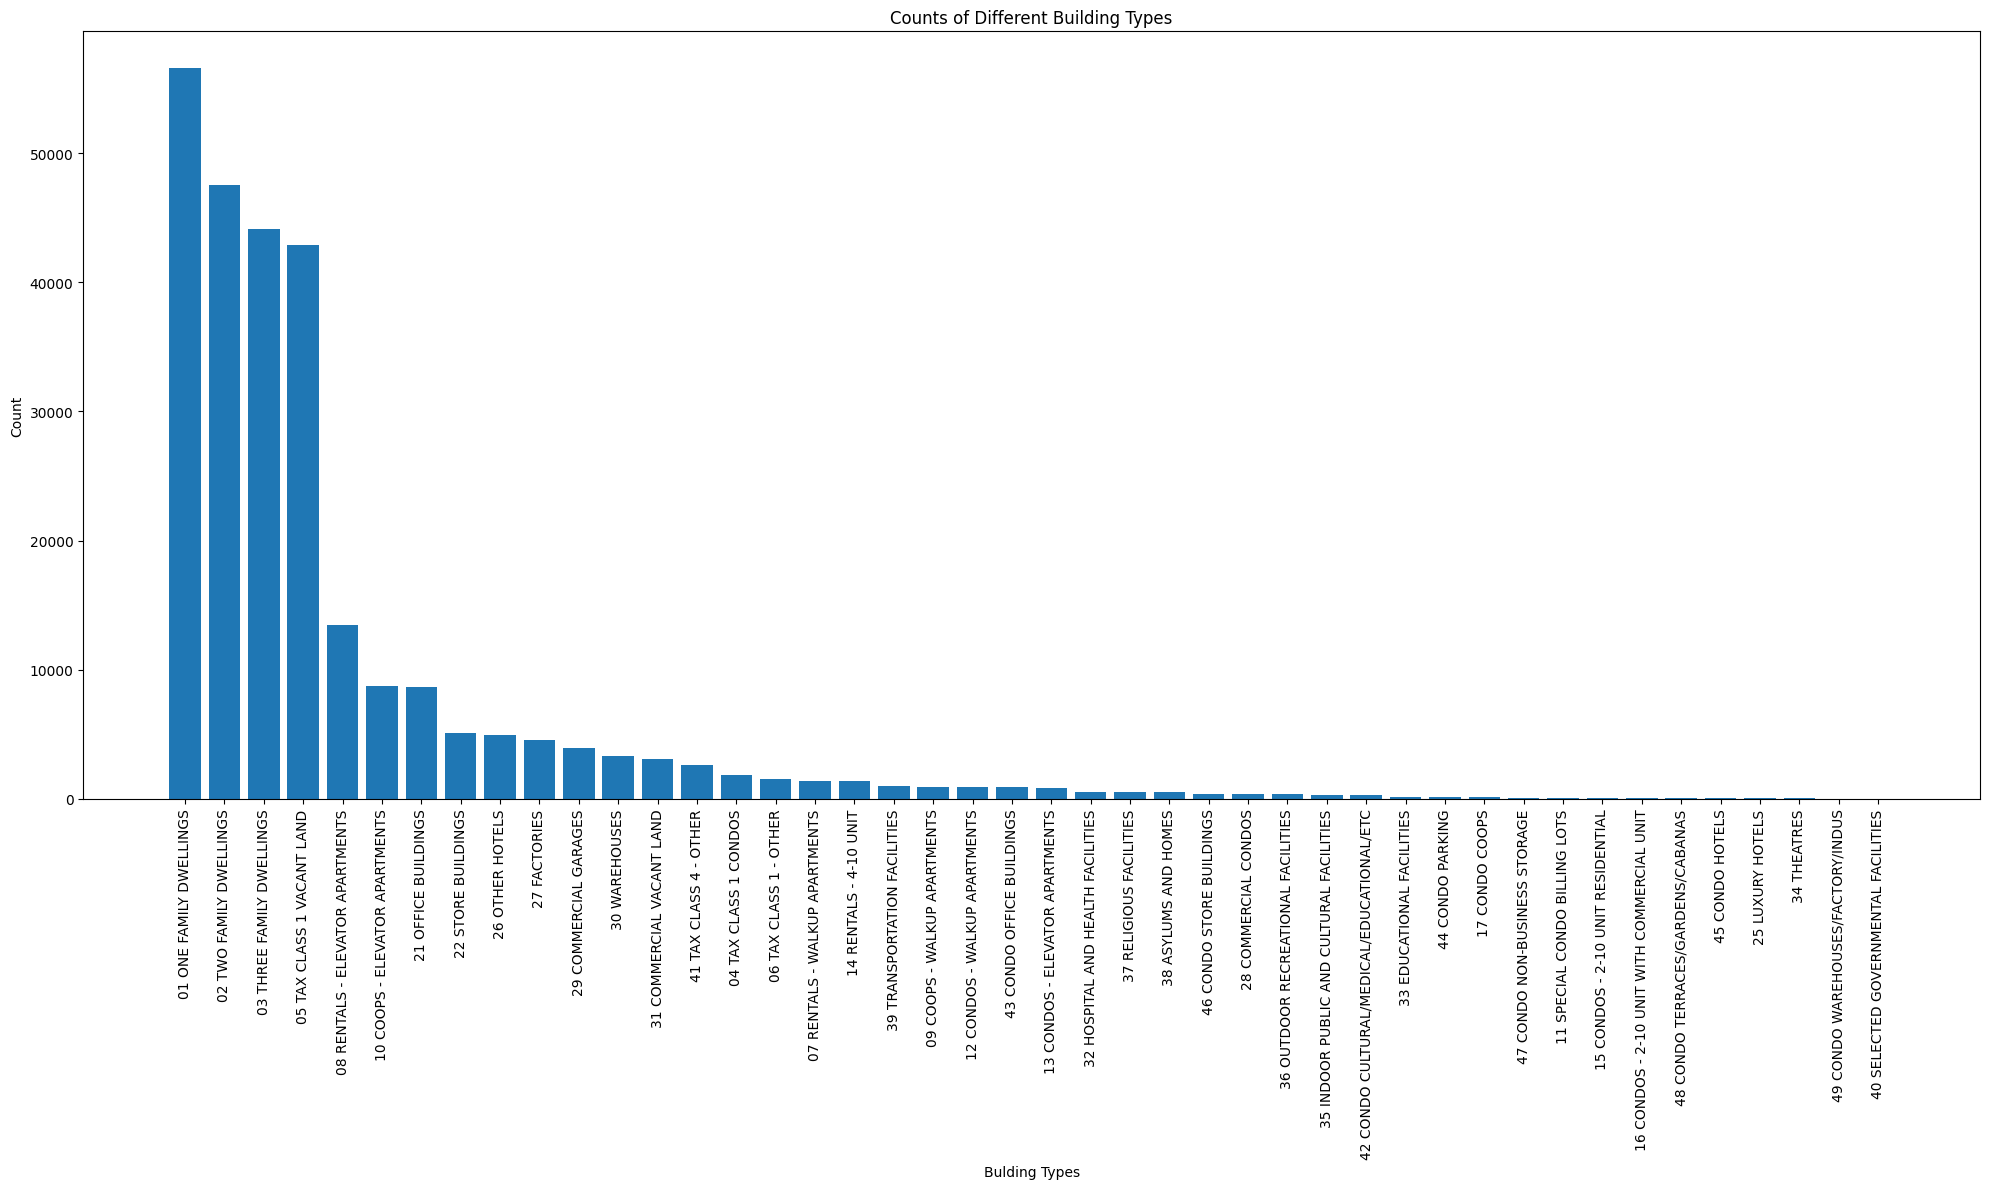

In [21]:
# Create a bar chart for types of houses
plt.figure(figsize=(20, 12))
plt.bar(df['BUILDING CLASS CATEGORY'].unique(), df['BUILDING CLASS CATEGORY'].value_counts())
plt.ylabel('Count')
plt.xlabel('Bulding Types')
plt.xticks(rotation=90)
plt.title('Counts of Different Building Types')
plt.tight_layout() 
plt.show()

In [22]:
def create_bar_chart_for_house_type(df, house_type):
    df = df[df['BUILDING CLASS CATEGORY'] == house_type]
    plt.figure(figsize=(10, 6))
    plt.bar(df['BUILDING CLASS AT PRESENT'].unique(), df['BUILDING CLASS AT PRESENT'].value_counts())
    plt.ylabel('Count')
    plt.xlabel('Bulding Class at Present for ' + house_type + ' type houses')
    plt.xticks(rotation=90)
    plt.title('Counts of Building Classes at Present')
    plt.tight_layout()  # Ensures the labels fit properly
    plt.show()

def create_bar_chart_for_house_type_by_borough(df, house_type, borough):
    df = df[df['BUILDING CLASS CATEGORY'] == house_type]
    df = df[df['BOROUGH'] == borough]
    plt.figure(figsize=(10, 6))
    plt.bar(df['BUILDING CLASS AT PRESENT'].unique(), df['BUILDING CLASS AT PRESENT'].value_counts())
    plt.ylabel('Count')
    plt.xlabel('Bulding Class at Present for ' + house_type + ' type houses in borough ' + str(borough))
    plt.xticks(rotation=90)
    plt.title('Counts of Building Classes at Present')
    plt.tight_layout()  # Ensures the labels fit properly
    plt.show()


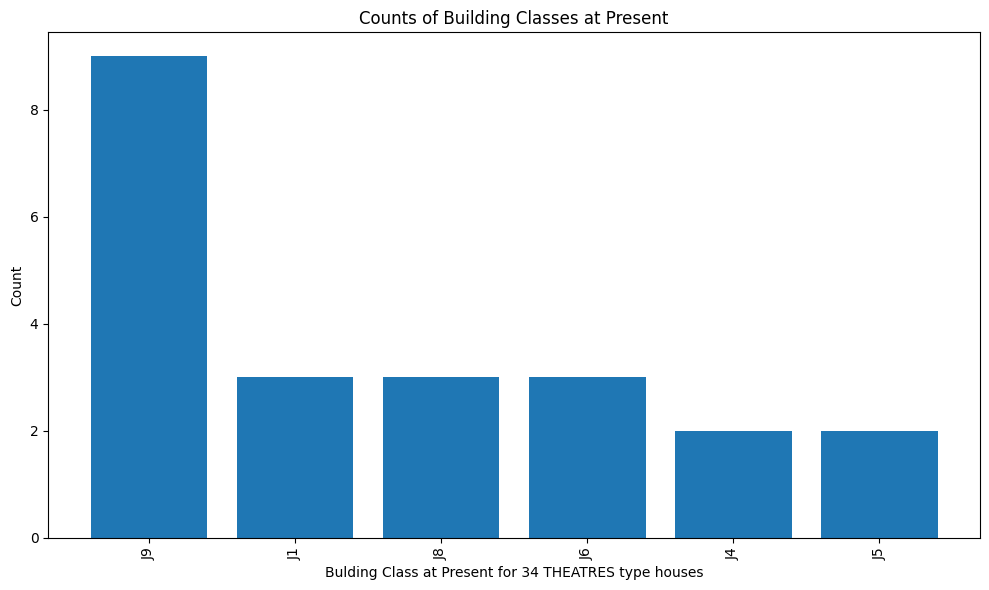

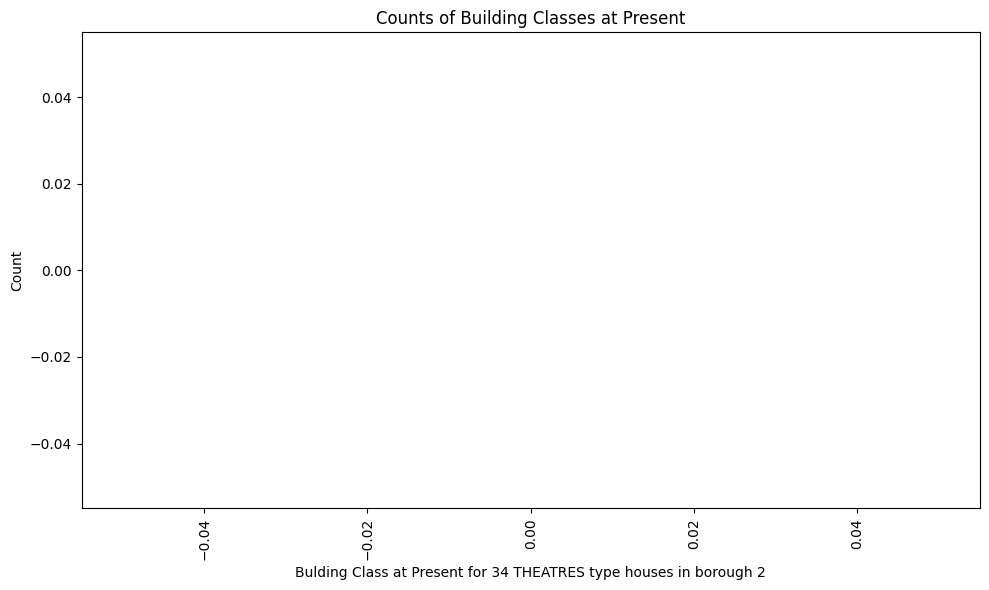

In [23]:
random_house_type = random.choice(df['BUILDING CLASS CATEGORY'].unique())
random_borough = random.choice(df['BOROUGH'].unique())
create_bar_chart_for_house_type(df, random_house_type)
create_bar_chart_for_house_type_by_borough(df, random_house_type, random_borough)

<p>As we can see from the findings calculated, there are a total of 44 different building types and a total of 264,350 houses in the dataset. We can see that the top 5 house types sold were: 

<ol>
    <li>01 ONE FAMILY DWELLINGS: 56613
    <li>02 TWO FAMILY DWELLINGS: 47578
    <li>13 CONDOS - ELEVATOR APARTMENTS: 44114
    <li>10 COOPS - ELEVATOR APARTMENTS: 42903
    <li>03 THREE FAMILY DWELLINGS: 13450
</ol>

In addition through the bar graph titled 'Counts of Different Building Types' we can see that after the top 5 building types there is a steep decline in the amount of sales for other building types with the lowest building type being 'SELECTED GOVERNMENTAL FACILITIES' at 4 sales. This outcome can be infered as true due to the nature of the buildings. Since many governmental buildings are most likely actively used for governmental purposes they are not being sold often whereas families often move due to verious factors so family dwellings being sold often can be forseen. 
</p>

In [24]:
#missing values in the provided dataset.
print('Missing values in the given dataset')
print(df.isnull().sum())

Missing values in the given dataset
BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                 347
BLOCK                                  0
LOT                                    0
EASE-MENT                         264350
BUILDING CLASS AT PRESENT            347
ADDRESS                                0
APARTMENT NUMBER                  198893
ZIP CODE                              17
RESIDENTIAL UNITS                  64181
COMMERCIAL UNITS                  113744
TOTAL UNITS                        55927
LAND SQUARE FEET                  121998
GROSS SQUARE FEET                 121998
YEAR BUILT                         18007
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
REGION                                 0
YEAR                                   0
dtype: int64


<Axes: >

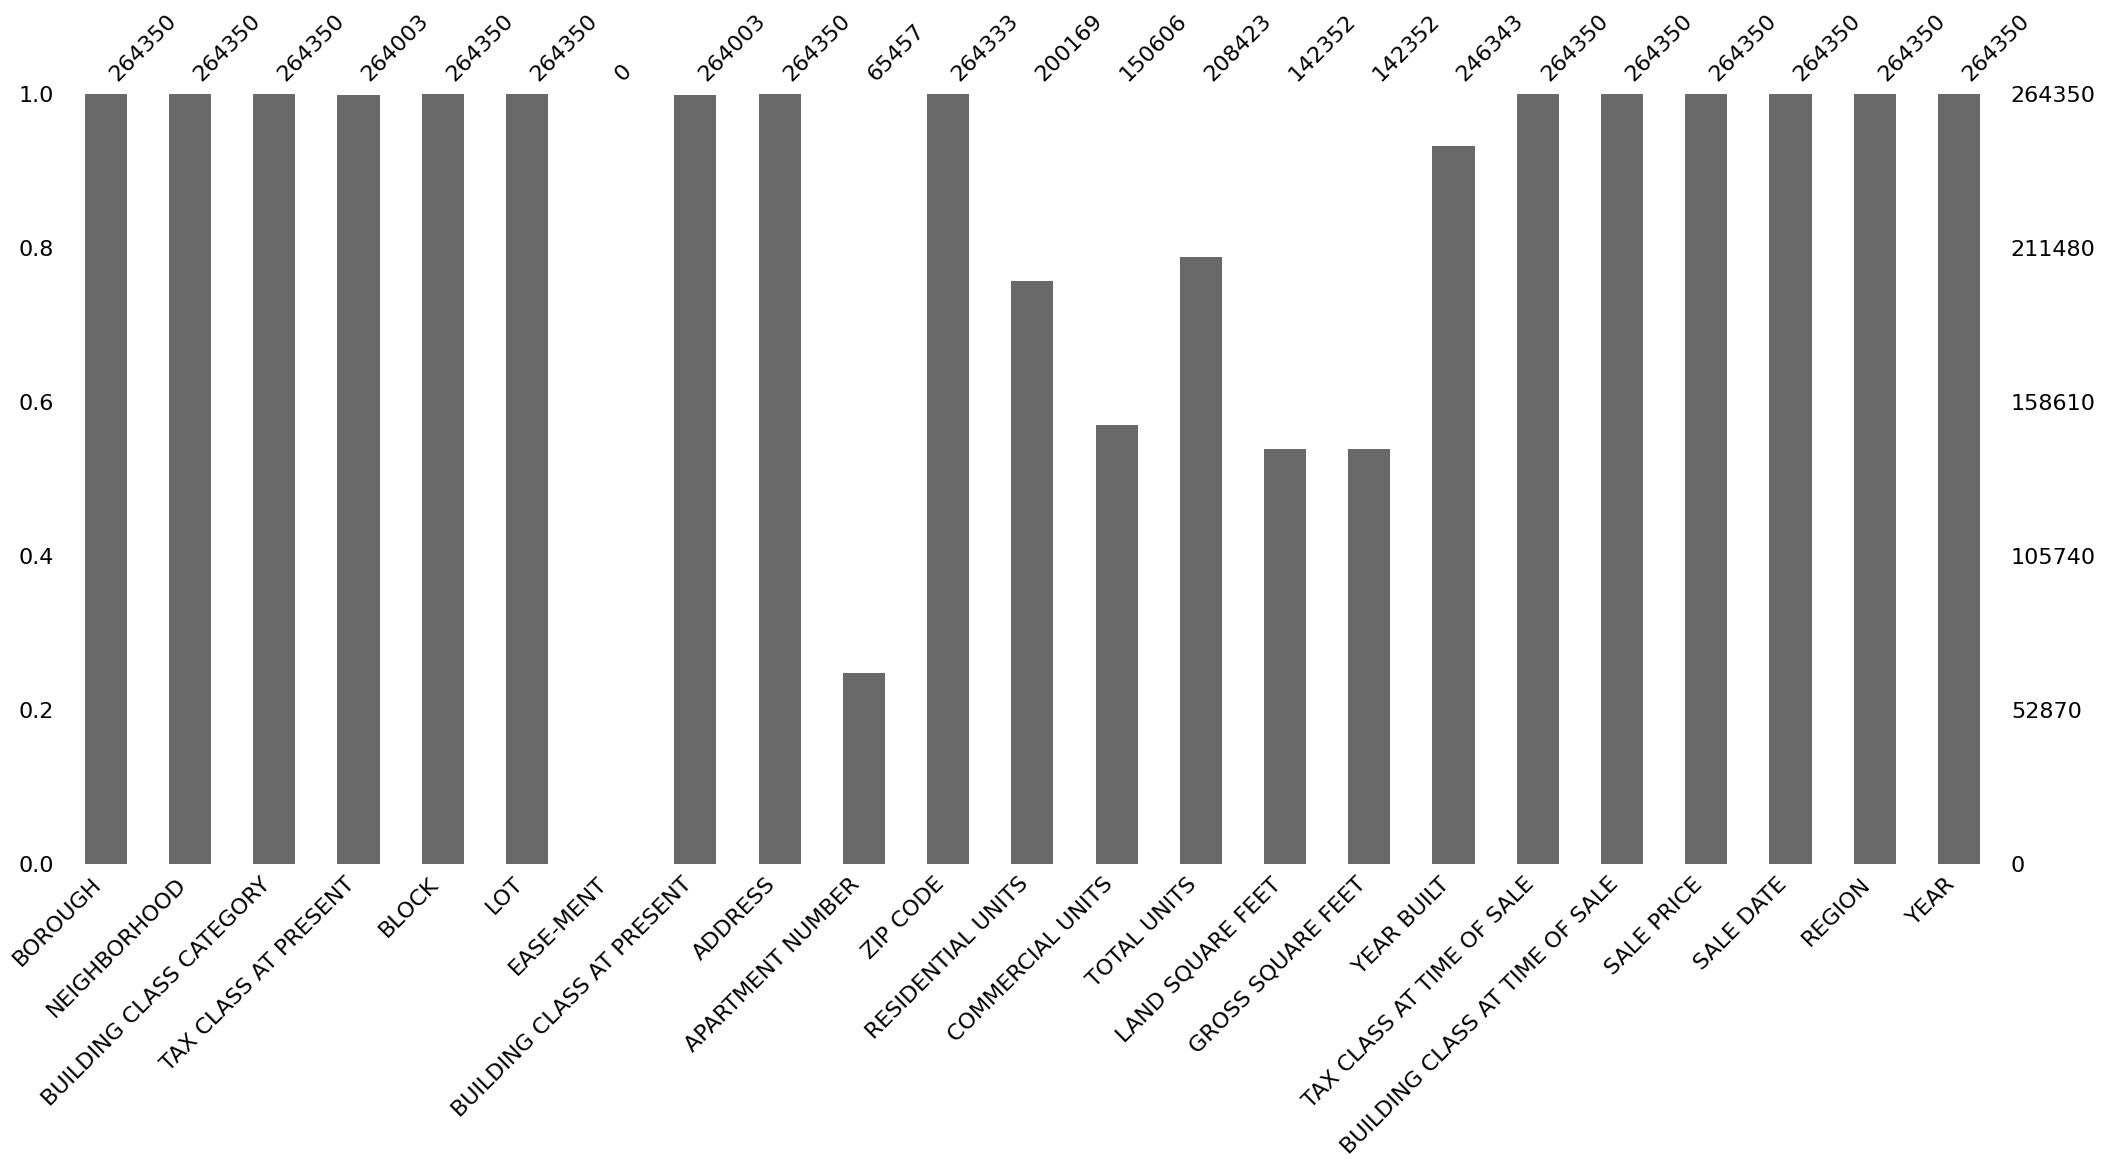

In [25]:
msno.bar(df)

<Axes: >

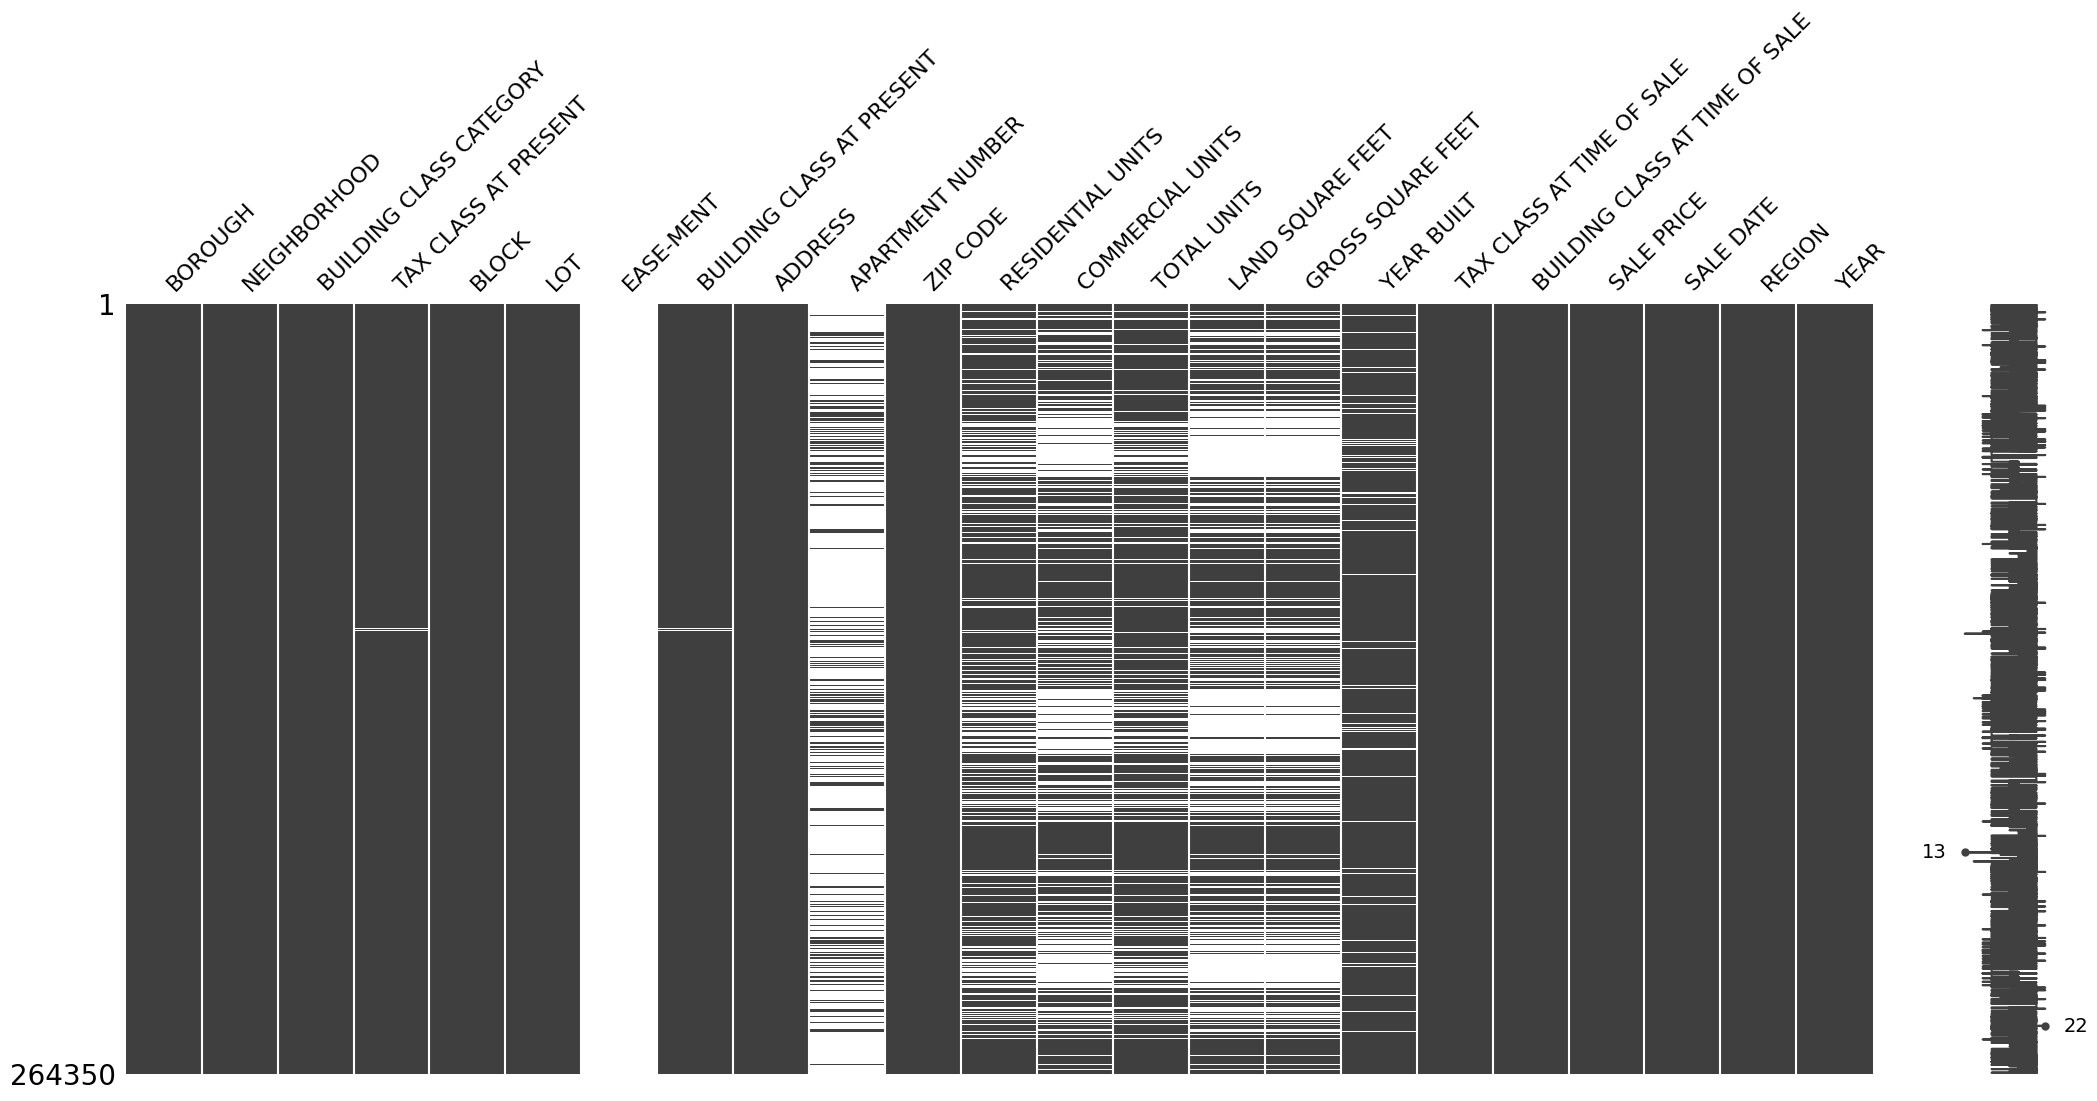

In [26]:
#create matrix to show missing values
msno.matrix(df)

In [27]:
#print the unique values in EASE-MENT column
print('\nUnique values in EASE-MENT column')
print(df['EASE-MENT'].unique())


Unique values in EASE-MENT column
[nan]


In [28]:
#drop EASE-MENT column from df
df.drop('EASE-MENT', axis=1, inplace=True)

In [29]:
#check that missing rows in TAX CLASS AT PRESENT column are also missing in Building Class At Present column
print('\nCheck missing rows in Building Class At Present column')
print(df[df['BUILDING CLASS AT PRESENT'].isnull()].head())
print('\nCheck missing rows in TAX CLASS AT PRESENT column')
print(df[df['TAX CLASS AT PRESENT'].isnull()].head())
#drop rows with missing values in TAX CLASS AT PRESENT column
df.dropna(subset=['TAX CLASS AT PRESENT'], inplace=True)


Check missing rows in Building Class At Present column
       BOROUGH            NEIGHBORHOOD            BUILDING CLASS CATEGORY  \
3653         2  MOTT HAVEN/PORT MORRIS               28 COMMERCIAL CONDOS   
3654         2  MOTT HAVEN/PORT MORRIS               28 COMMERCIAL CONDOS   
10712        3      BEDFORD STUYVESANT               28 COMMERCIAL CONDOS   
13574        3            BOROUGH PARK  15 CONDOS - 2-10 UNIT RESIDENTIAL   
13575        3            BOROUGH PARK  15 CONDOS - 2-10 UNIT RESIDENTIAL   

      TAX CLASS AT PRESENT  BLOCK   LOT BUILDING CLASS AT PRESENT  \
3653                   NaN   2308  1001                       NaN   
3654                   NaN   2308  1002                       NaN   
10712                  NaN   1886  1801                       NaN   
13574                  NaN   5586  1202                       NaN   
13575                  NaN   5586  1204                       NaN   

                       ADDRESS APARTMENT NUMBER  ZIP CODE  ...  TO

In [30]:
#find the average year built for each neighborhood
print('\nAverage year built for each neighborhood')
print(df.groupby('NEIGHBORHOOD')['YEAR BUILT'].mean())


Average year built for each neighborhood
NEIGHBORHOOD
AIRPORT JFK           2023.000000
AIRPORT LA GUARDIA    1947.142857
ALPHABET CITY         1937.442396
ANNADALE              1980.098765
ARDEN HEIGHTS         1988.156560
                         ...     
WOODHAVEN             1921.913470
WOODLAWN              1940.343234
WOODROW               1993.464444
WOODSIDE              1949.567663
WYCKOFF HEIGHTS       1941.016173
Name: YEAR BUILT, Length: 255, dtype: float64


In [31]:
#print the average amount of records in all neighborhoods
print('\nAverage amount of records in all neighborhoods')
print(df['NEIGHBORHOOD'].value_counts().mean())


Average amount of records in all neighborhoods
1035.3058823529411


In [32]:
#Chat GPT aided in with this code
#print the oldest and newest nieghborhoods by average year built with the year shown with atleast 100 records
print('\nOldest and newest nieghborhoods by average year built with the year shown with atleast 100 records')
print(df.groupby('NEIGHBORHOOD').filter(lambda x: len(x) >= 100).groupby('NEIGHBORHOOD')['YEAR BUILT'].mean().sort_values(ascending=True).head(1))
print(df.groupby('NEIGHBORHOOD').filter(lambda x: len(x) >= 100).groupby('NEIGHBORHOOD')['YEAR BUILT'].mean().sort_values(ascending=True).tail(1))


Oldest and newest nieghborhoods by average year built with the year shown with atleast 100 records


NEIGHBORHOOD
CYPRESS HILLS    1917.487432
Name: YEAR BUILT, dtype: float64
NEIGHBORHOOD
SPRING CREEK    2011.357143
Name: YEAR BUILT, dtype: float64


In [33]:
#print house types in Cypress Hills and Spring Creek with counts
print('\nHouse types in Cypress Hills and Spring Creek with counts')
print(df[df['NEIGHBORHOOD'] == 'CYPRESS HILLS']['BUILDING CLASS CATEGORY'].value_counts().head())
print(df[df['NEIGHBORHOOD'] == 'SPRING CREEK']['BUILDING CLASS CATEGORY'].value_counts().head())


House types in Cypress Hills and Spring Creek with counts
BUILDING CLASS CATEGORY
02 TWO FAMILY DWELLINGS           492
01 ONE FAMILY DWELLINGS           181
03 THREE FAMILY DWELLINGS         116
07 RENTALS - WALKUP APARTMENTS     26
14 RENTALS - 4-10 UNIT             25
Name: count, dtype: int64
BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS               41
36 OUTDOOR RECREATIONAL FACILITIES    19
05 TAX CLASS 1 VACANT LAND            17
02 TWO FAMILY DWELLINGS               11
22 STORE BUILDINGS                    10
Name: count, dtype: int64


In [34]:
#Chat GPT aided in with this code
#fill missing values in YEAR BUILT column with average year built for each neighborhood
df['YEAR BUILT'] = df.groupby('NEIGHBORHOOD')['YEAR BUILT'].transform(lambda x: x.fillna(x.mean()))

In [35]:
#print count of records with missing residential units
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
64105

Count of records with missing commercial units
113450

Count of records with missing total units
55904


In [36]:
# Fill in missing 'RESIDENTIAL UNITS' values
df['RESIDENTIAL UNITS'] = np.where(
    df['RESIDENTIAL UNITS'].isnull() & df['COMMERCIAL UNITS'].notnull() & df['TOTAL UNITS'].notnull(),
    df['TOTAL UNITS'] - df['COMMERCIAL UNITS'],
    df['RESIDENTIAL UNITS']
)

# Fill in missing 'COMMERCIAL UNITS' values
df['COMMERCIAL UNITS'] = np.where(
    df['COMMERCIAL UNITS'].isnull() & df['RESIDENTIAL UNITS'].notnull() & df['TOTAL UNITS'].notnull(),
    df['TOTAL UNITS'] - df['RESIDENTIAL UNITS'],
    df['COMMERCIAL UNITS']
)

# Fill in missing 'TOTAL UNITS' values
df['TOTAL UNITS'] = np.where(
    df['TOTAL UNITS'].isnull() & df['RESIDENTIAL UNITS'].notnull() & df['COMMERCIAL UNITS'].notnull(),
    df['RESIDENTIAL UNITS'] + df['COMMERCIAL UNITS'],
    df['TOTAL UNITS']
)

In [37]:
#print count of records with missing residential units
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
55904

Count of records with missing commercial units
55904

Count of records with missing total units
55904


In [38]:
#print the types of houses that are missing total units and the counts
print('\nTypes of houses that are missing total units and the counts')
print(df[df['TOTAL UNITS'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())


Types of houses that are missing total units and the counts
BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS    42903
09 COOPS - WALKUP APARTMENTS       8630
17 CONDO COOPS                     3943
01 ONE FAMILY DWELLINGS             428
Name: count, dtype: int64


In [39]:
#print a house that is of type one family dwelling and is not missing total units
print('\nA house that is of type one family dwelling and is not missing total units')
print(df[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & (df['TOTAL UNITS'].notnull())].head())


A house that is of type one family dwelling and is not missing total units
   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3028   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3039   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3045   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3046   

   LOT BUILDING CLASS AT PRESENT                ADDRESS APARTMENT NUMBER  \
0   23                        A1  408 EAST 179TH STREET              NaN   
1   24                        A1  410 EAST 179TH STREET              NaN   
2   63                        A1  469 EAST 185TH STREET              NaN   
3   12                        A1   2052 BATHGATE AVENUE              NaN   
4   39                        A1   2075 BATHGATE AVENUE        

In [40]:
#fill in all one family dwelling houses with 1 for total units, 1 for residential units and 0 for commercial units if missing
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['TOTAL UNITS'].isnull(), 'TOTAL UNITS'] = 1
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['RESIDENTIAL UNITS'].isnull(), 'RESIDENTIAL UNITS'] = 1
df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') & df['COMMERCIAL UNITS'].isnull(), 'COMMERCIAL UNITS'] = 0

In [41]:
#fill all records with a commercial unit value of non 0 as the same for total units and set 0 for the residential units
df.loc[df['COMMERCIAL UNITS'].notnull(), 'RESIDENTIAL UNITS'] = 0
df.loc[df['COMMERCIAL UNITS'].notnull(), 'TOTAL UNITS'] = df['COMMERCIAL UNITS']

In [42]:
#fill all records with a residential unit value of non 0 as the same for total units and set 0 for the commercial units
df.loc[df['RESIDENTIAL UNITS'].notnull(), 'COMMERCIAL UNITS'] = 0
df.loc[df['RESIDENTIAL UNITS'].notnull(), 'TOTAL UNITS'] = df['RESIDENTIAL UNITS']

In [43]:
#print the types of houses that are missing total units and the counts
print('\nTypes of houses that are missing total units and the counts')
print(df[df['TOTAL UNITS'].isnull()]['BUILDING CLASS CATEGORY'].value_counts())


Types of houses that are missing total units and the counts
BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS    42903
09 COOPS - WALKUP APARTMENTS       8630
17 CONDO COOPS                     3943
Name: count, dtype: int64


In [44]:
print('\nCount of records with missing residential units')
print(df['RESIDENTIAL UNITS'].isnull().sum())
print('\nCount of records with missing commercial units')
print(df['COMMERCIAL UNITS'].isnull().sum())
print('\nCount of records with missing total units')
print(df['TOTAL UNITS'].isnull().sum())


Count of records with missing residential units
55476

Count of records with missing commercial units
55476

Count of records with missing total units
55476


In [45]:
#print all records with missing zip codes
print('\nAll records with missing zip codes')
print(df[df['ZIP CODE'].isnull()])


All records with missing zip codes
        BOROUGH   NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
95524         5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
130576        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130577        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130578        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
130579        3   SPRING CREEK  05 TAX CLASS 1 VACANT LAND   
155256        4        ARVERNE       29 COMMERCIAL GARAGES   
184463        5     BLOOMFIELD   31 COMMERCIAL VACANT LAND   
189351        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
208097        3  EAST NEW YORK       29 COMMERCIAL GARAGES   
234870        4        ARVERNE       29 COMMERCIAL GARAGES   
258018        5  ARDEN HEIGHTS   31 COMMERCIAL VACANT LAND   
260805        5  MIDLAND BEACH  05 TAX CLASS 1 VACANT LAND   
261894        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
261895        5  OAKWOOD-BEACH  05 TAX CLASS 1 VACANT LAND   
261896        5  OAKWOOD-BEACH  05

In [46]:
#replace all missing zip codes with the zip codes found manually on google maps
df.loc[(df['ADDRESS'] == 'N/A PROMENADE AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10306
df.loc[(df['ADDRESS'] == 'N/A VANDALIA AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11207
df.loc[(df['ADDRESS'] == 'N/A DREW STREET') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11208
df.loc[(df['ADDRESS'] == 'N/A BEACH CHANNEL DRIVE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11693
df.loc[(df['ADDRESS'] == 'N/A GREAT KILLS LANE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10308
df.loc[(df['ADDRESS'] == 'N/A GULF AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10314
df.loc[(df['ADDRESS'] == 'N/A DONGAN HILLS AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10305
df.loc[(df['ADDRESS'] == 'N/A LINDNER AVENUE') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 10312
df.loc[(df['ADDRESS'] == 'N/A LINDEN BOULEVARD') & df['ZIP CODE'].isnull(), 'ZIP CODE'] = 11207

In [47]:
#print amount of records with 0 as as their sale price value
print('\nAmount of records with 0 as sale price')
print(len(df[df['SALE PRICE'] == 0]))


Amount of records with 0 as sale price
75549


<Axes: >

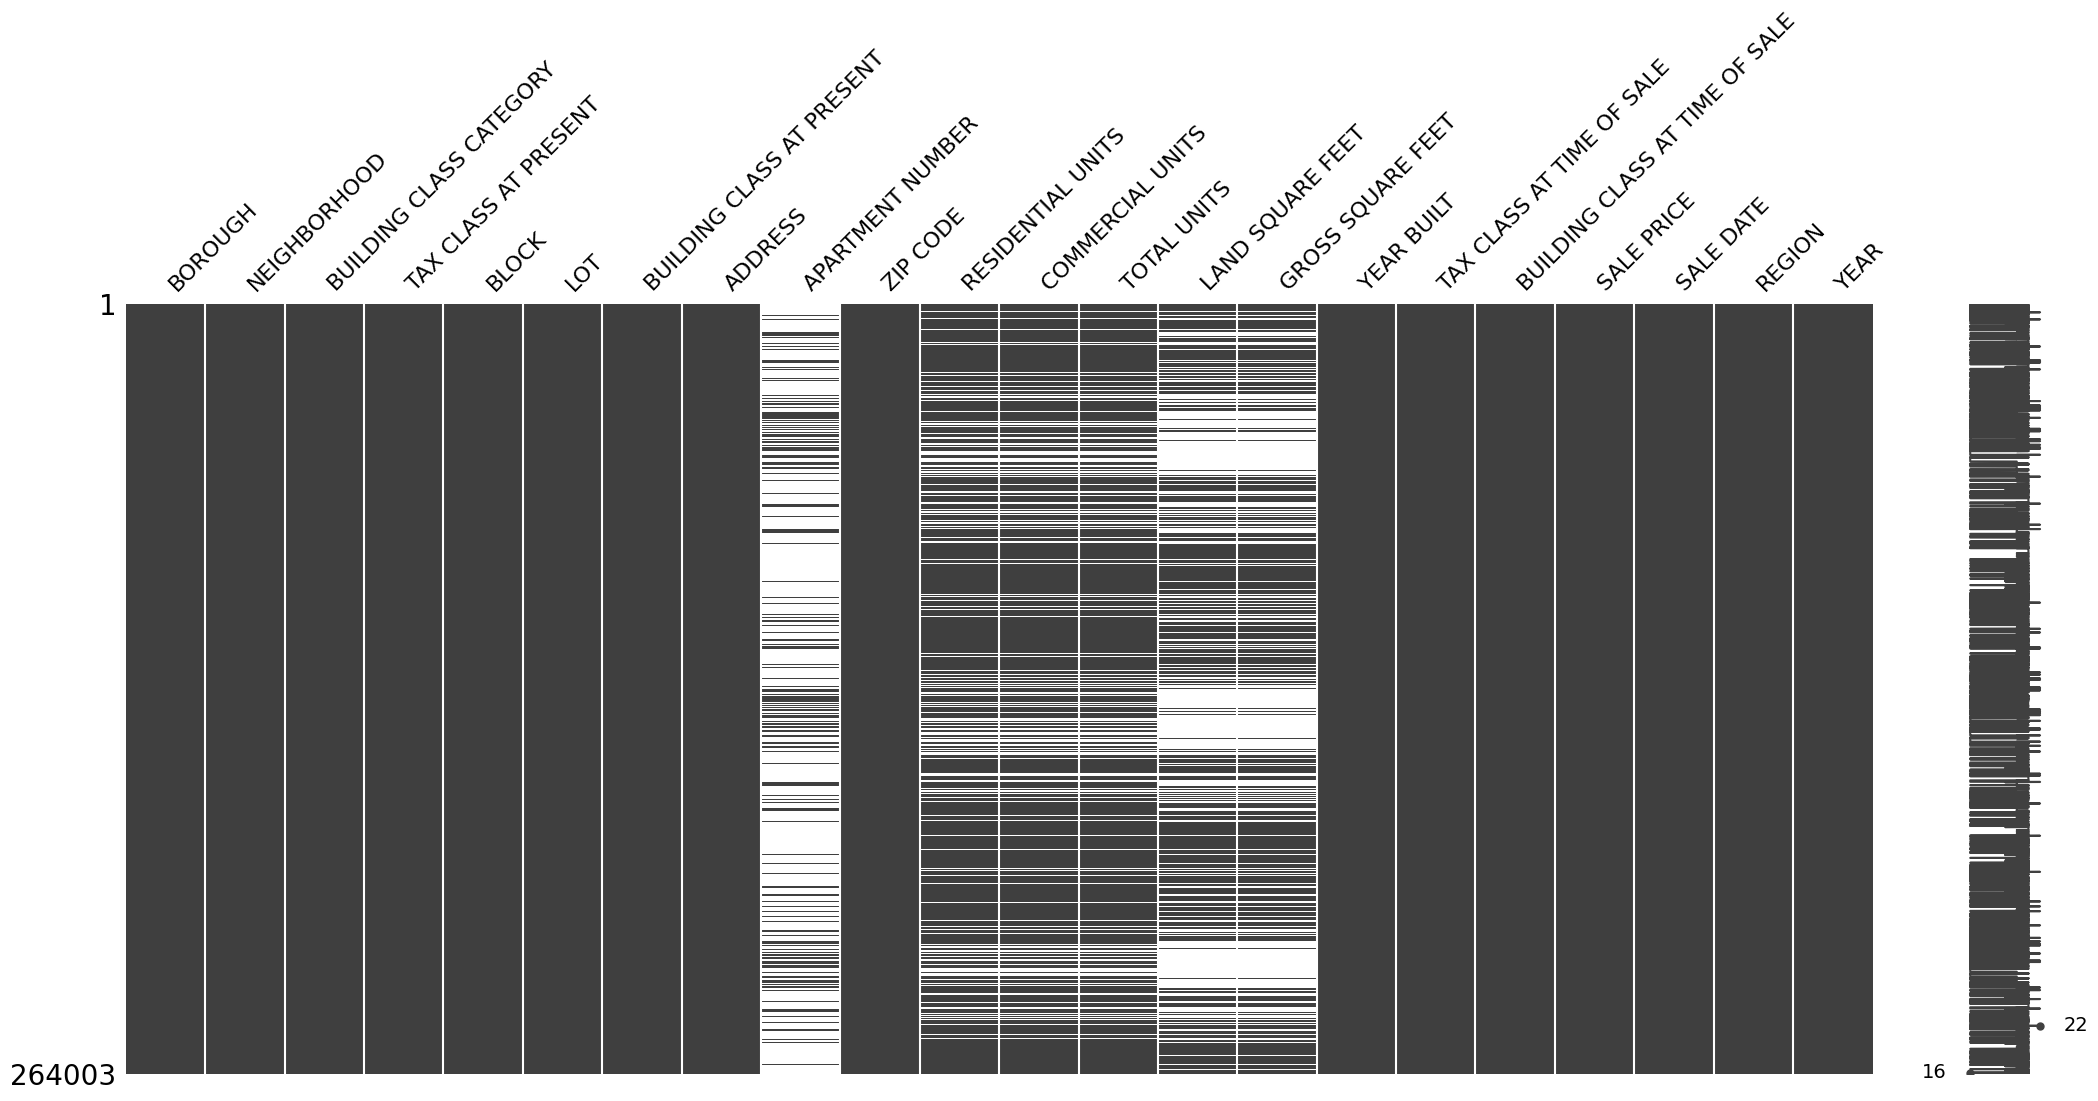

In [48]:
msno.matrix(df)

In [49]:
df = df[~df['BUILDING CLASS CATEGORY'].isin(['10 COOPS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS', '17 CONDO COOPS'])]

<Axes: >

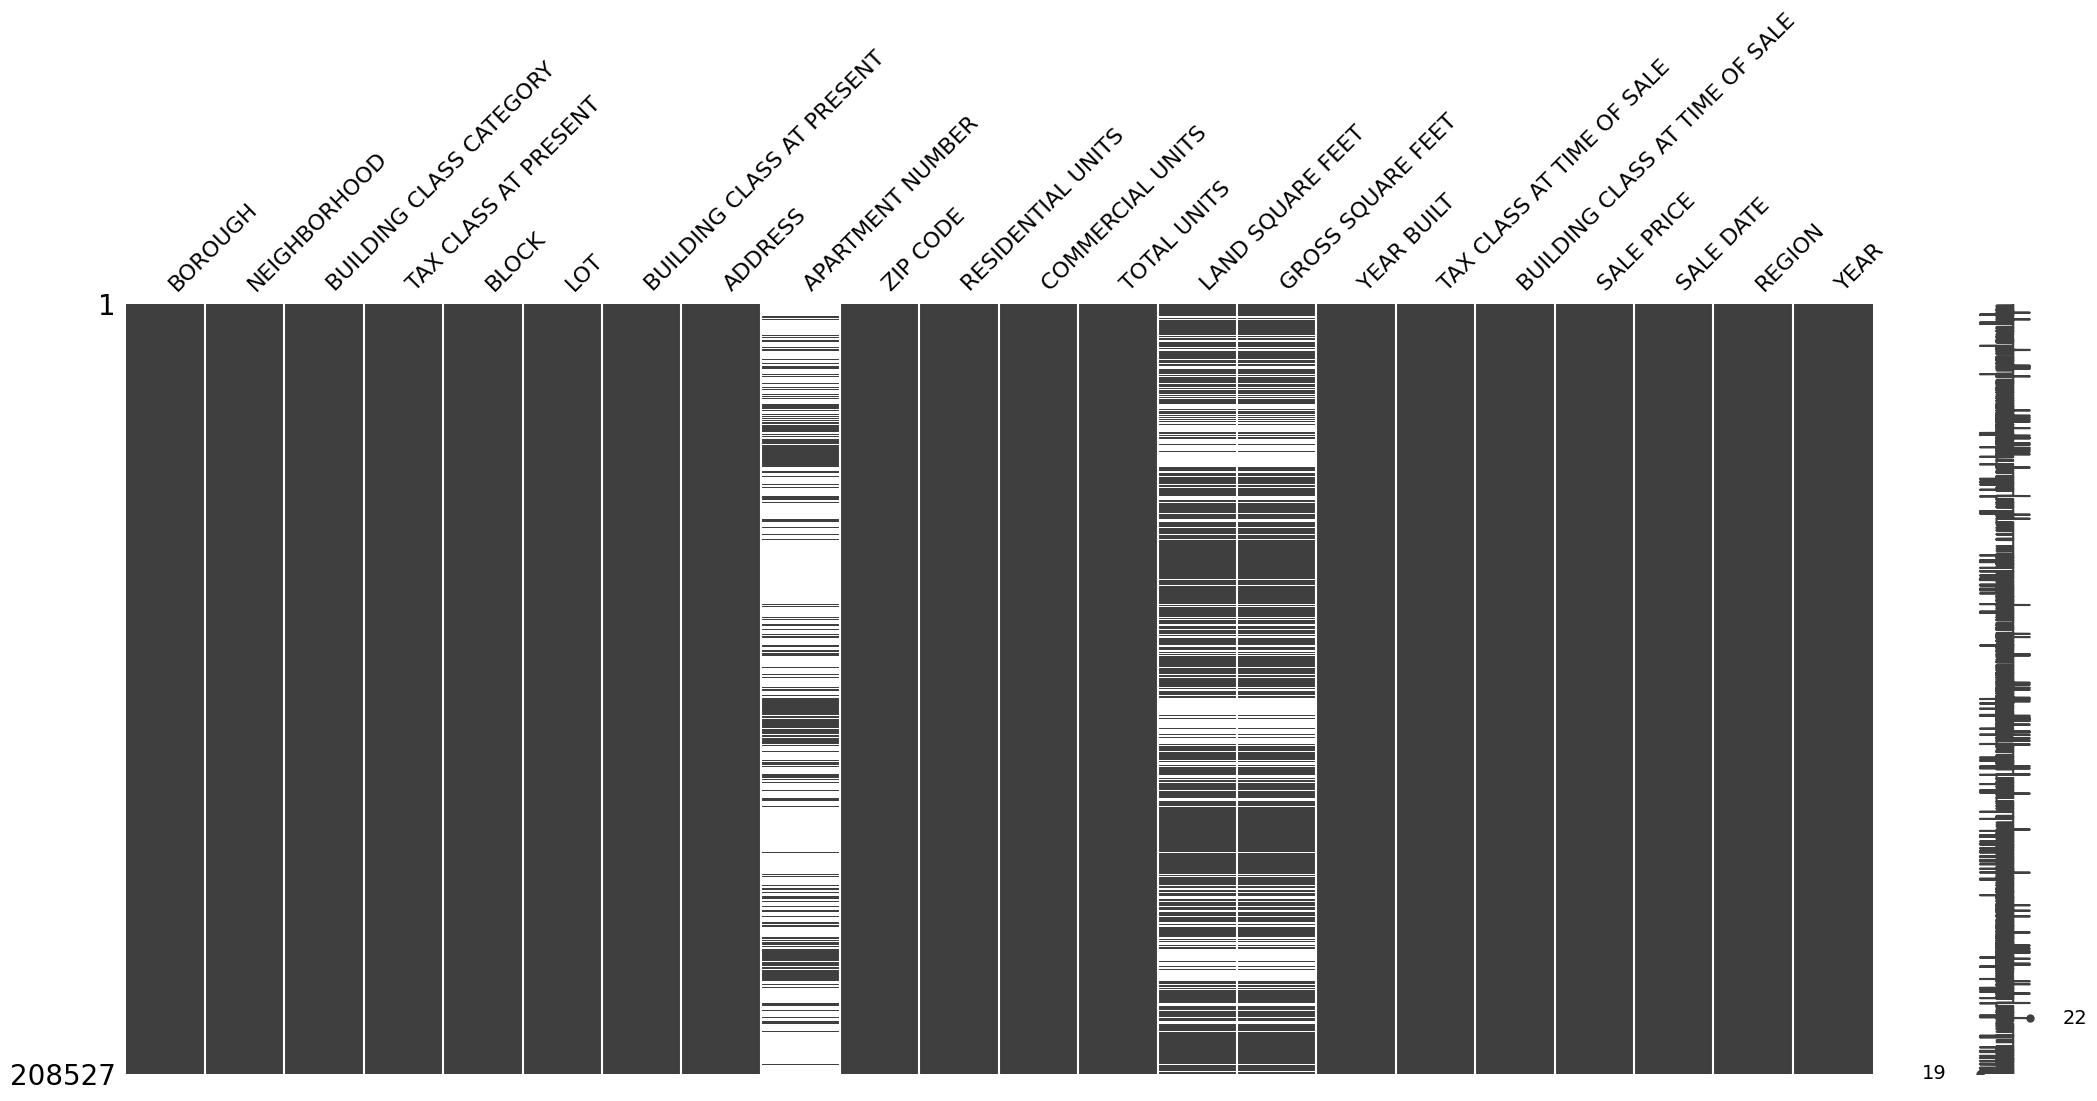

In [50]:
msno.matrix(df)

In [51]:
#missing values in the provided dataset.
print('Missing values in the given dataset')
print(df.isnull().sum())

Missing values in the given dataset
BOROUGH                                0
NEIGHBORHOOD                           0
BUILDING CLASS CATEGORY                0
TAX CLASS AT PRESENT                   0
BLOCK                                  0
LOT                                    0
BUILDING CLASS AT PRESENT              0
ADDRESS                                0
APARTMENT NUMBER                  143070
ZIP CODE                               0
RESIDENTIAL UNITS                      0
COMMERCIAL UNITS                       0
TOTAL UNITS                            0
LAND SQUARE FEET                   66175
GROSS SQUARE FEET                  66175
YEAR BUILT                             0
TAX CLASS AT TIME OF SALE              0
BUILDING CLASS AT TIME OF SALE         0
SALE PRICE                             0
SALE DATE                              0
REGION                                 0
YEAR                                   0
dtype: int64


<p>In this section the missing values were analyzed, visualized and mostly handled. The missing values were identified to be in 12 attributes in the dataset. It was identified that the Ease-ment attribute was entirely missing so it was subsequently dropped from the dataset. Visualizations were then created to see any trends in the missing values for the other attributes. It was identified that a small number of records (approx 340) had missing values in the TAX CLASS AT PRESENT attribute and those same records were also missing in the BUILDING CLASS AT PRESENT attribute these records were subsequently dropped from the dataset. The YEAR-BUILT attribute had approximately 18000 missing records (~6.7% of the dataset) and was filled using the average of year built in each neighborhood. It was also identified that of the neighborhoods with atleast 100 records Cypress Hill had the oldest average year built value at 1927, and Spring Creek had the youngest at 2011.</p>
<p>The RESIDENTIAL UNITS, COMMERCIAL UNITS and TOTAL UNITS were then identified as having a relationship between them. Being calculated by this formula:
<br><br>RESIDENTIAL UNITS + COMMERCIAL UNITS = TOTAL UNITS<br><br>
This was used to fill in any missing cells that contained atleast two other variables, ie. if a record was missing total units but had the amount of residential and commercial then their sum was calculated and the total units was added into that cell. Furthermore, it was identified that 4 house types were still missing units: '10 COOPS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS', '17 CONDO COOPS' and '01 ONE FAMILY DWELLINGS'. The '01 ONE FAMILY DWELLINGS' was tehn identified as always having 1 residential unit 0 commercial units and 1 total unit so all missing records of this class were filled in. Finally, a trend was identified that all house types containing 'COOPS' in their title had missing units.</p>